In [1]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('211981633', mission='K2').download()

/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:181: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [2]:
tpf

KeplerTargetPixelFile Object (ID: 211981633)

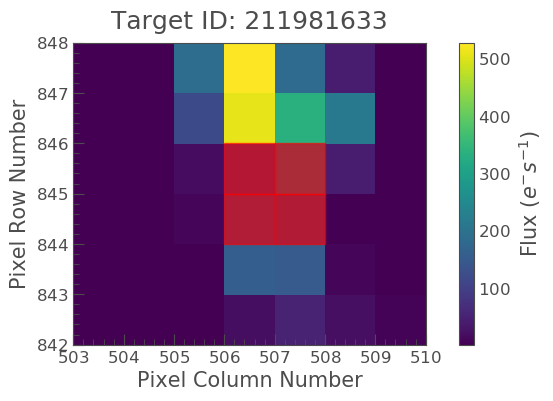

In [3]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

(0.9, 1.1)

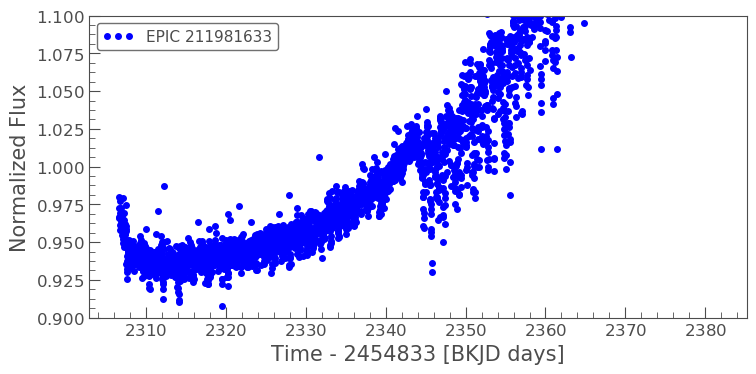

In [4]:
import matplotlib.pyplot as plt

user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.9,1.1)

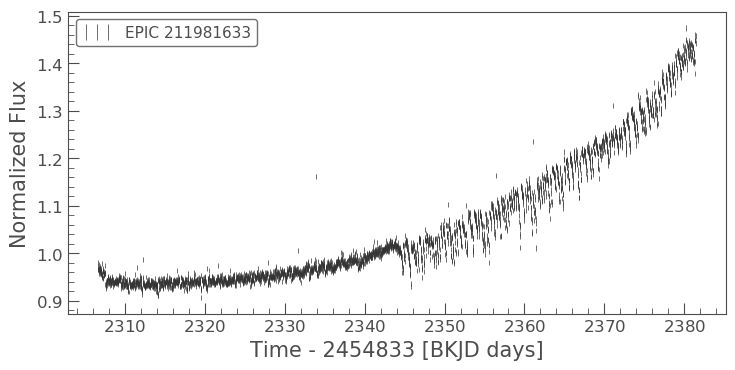

In [5]:
user_lc.errorbar();

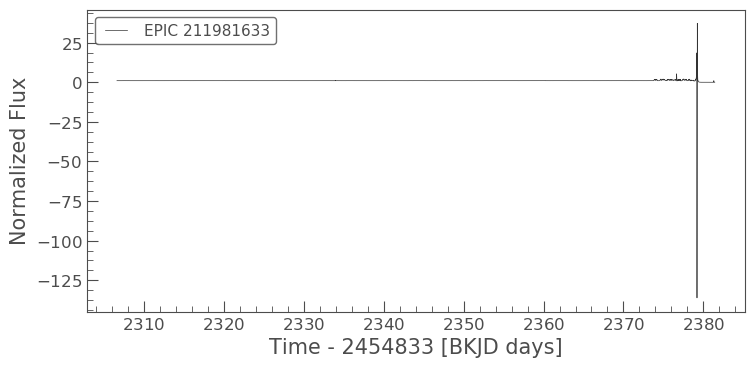

In [6]:
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

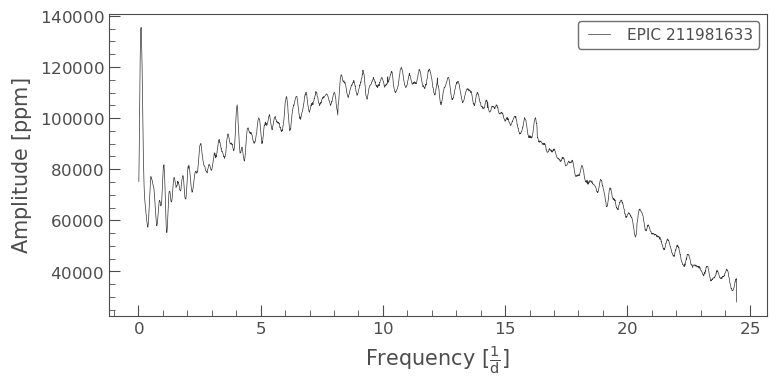

In [7]:
pg_sff = new_lc_sff.to_periodogram(oversample_factor=1)
pg_sff.plot()

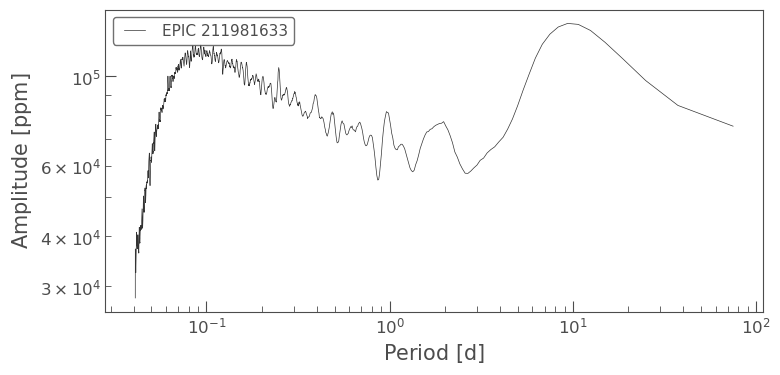

In [8]:
pg_sff.plot(view='period', scale='log')

Best period: 9.352638474592823 d


(0.9, 1.1)

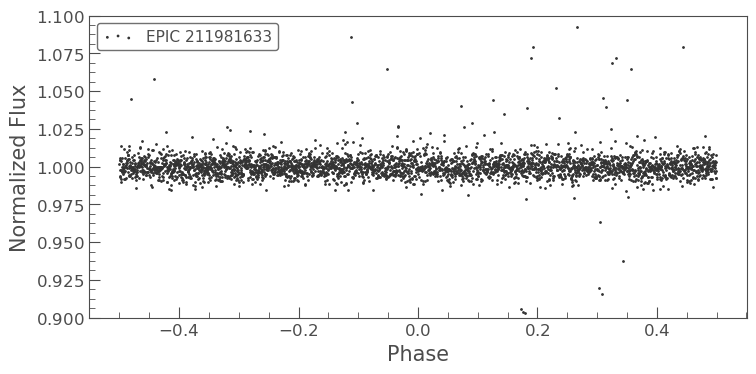

In [9]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();
plt.ylim(0.9,1.1)

Best period: 37.41055389837129 d


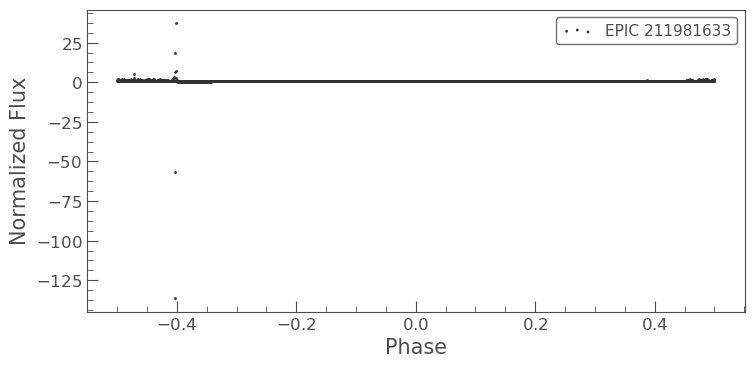

In [10]:
period = pg_sff.period_at_max_power * 4
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

In [11]:
import astropy.units as u
pg_sff = new_lc_sff.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

Best period: 0.9573925011707963 d


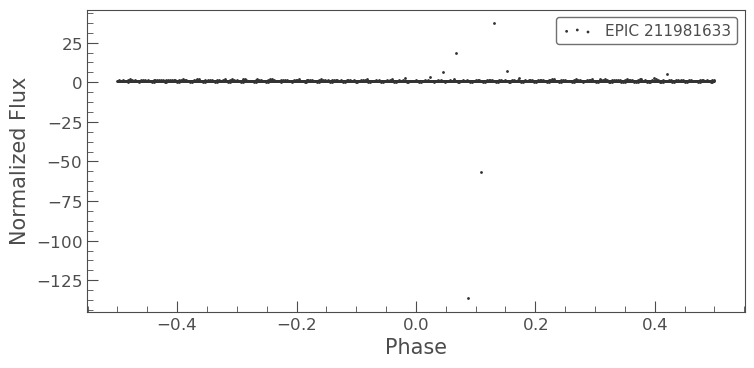

In [12]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();